<a href="https://colab.research.google.com/github/Taweilo/Diabetes_Prediction/blob/main/Code_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MIT License

Copyright (c) 2023 Tawei Lo

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# Diabetes Prediction

<img src="https://meddo.in/blog/wp-content/uploads/2020/09/onpage_Book-diagnostic-test-online-1024x575.jpeg" width="1000" height="450">

## 1. Business Understanding

### Importing all the libraries

In [1]:
# Data wrangling
import pandas as pd # handle dataframe &
import numpy as np # deal with number and data

# Data vizualization
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn modules for data preprocessing:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn modules for Model Evaluation & Improvement:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import auc, roc_auc_score, roc_curve

import warnings
warnings.simplefilter("ignore")

# set the random seed fixed for code reproduction
SEED = 12345

## 2. Data Understanding

### 2.1 Loading the data

In [2]:
# Provide the raw file URL
csv_url = 'https://raw.githubusercontent.com/Taweilo/Diabetes_Prediction/main/Data_diabetes.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_url)
# Display the first few rows of the DataFrame
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2.2 Feature Description

In [3]:
#check dimension
df.shape

(768, 9)

In [4]:
# check data type and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Descriptive analysis
df.describe().round(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
mean,3.8,120.9,69.1,20.5,79.8,32.0,0.5,33.2,0.3
std,3.4,32.0,19.4,16.0,115.2,7.9,0.3,11.8,0.5
min,0.0,0.0,0.0,0.0,0.0,0.0,0.1,21.0,0.0
25%,1.0,99.0,62.0,0.0,0.0,27.3,0.2,24.0,0.0
50%,3.0,117.0,72.0,23.0,30.5,32.0,0.4,29.0,0.0
75%,6.0,140.2,80.0,32.0,127.2,36.6,0.6,41.0,1.0
max,17.0,199.0,122.0,99.0,846.0,67.1,2.4,81.0,1.0


In [6]:
# Check Class Priors (i.e., target variable distribution in the population)
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

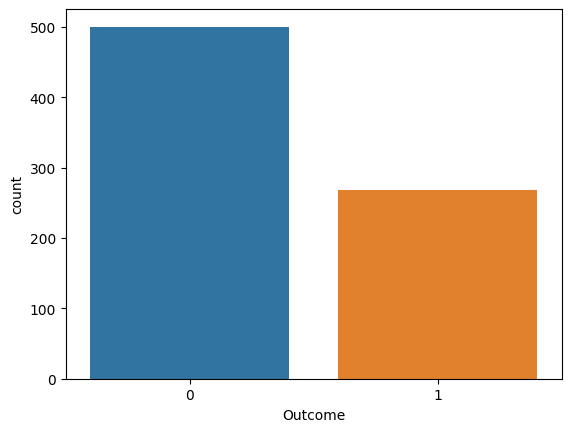

In [7]:
# Visulize distribution of Outcome
sns.countplot(data=df, x="Outcome")

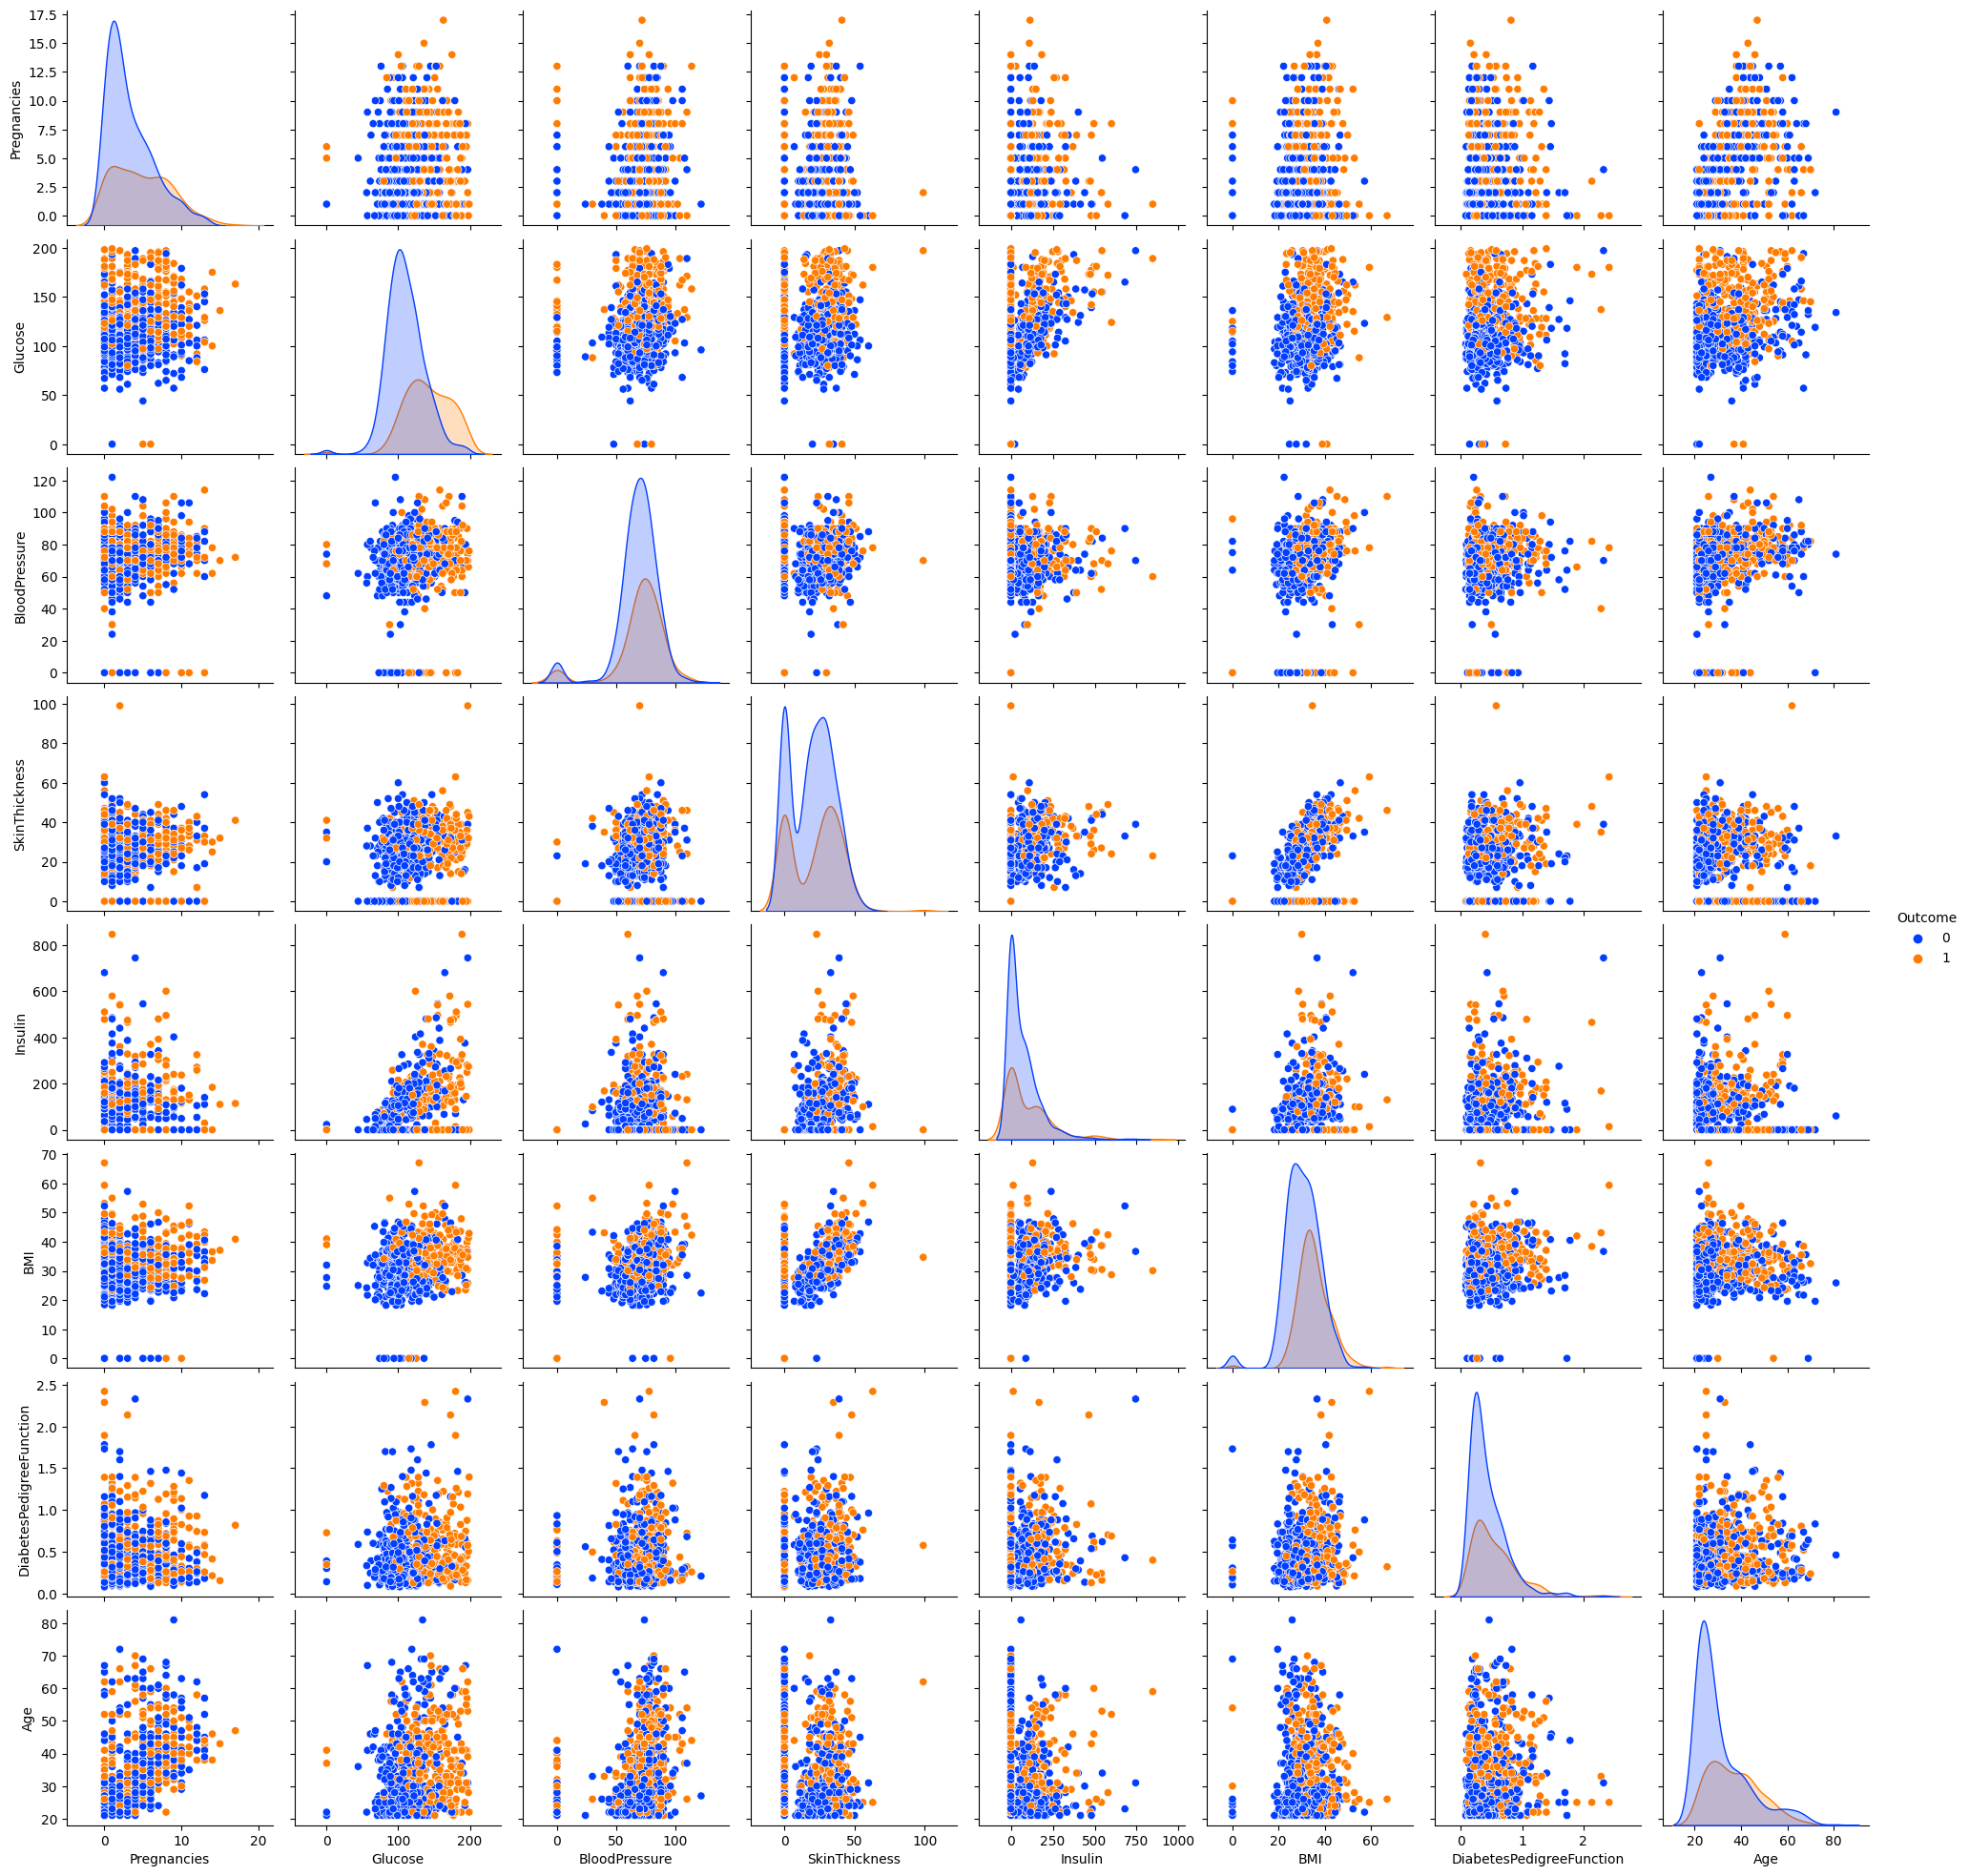

In [8]:
df = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']]
sns.pairplot(df, hue="Outcome", palette="bright")
plt.show()

## 3. Data Preparation

### 3.2 Define variables

In [9]:
# Create X, Y
# Prepare for X and y
y = df.Outcome
X = df.drop('Outcome',axis=1)

### 3.2 Split the data for train and test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.70) # here we use 70% test data; feel free to change

In [11]:
print(X_train.shape)
print(X_test.shape)

(230, 8)
(538, 8)


## 4. Modeling

In [51]:
# Initialize classifiers in consideration
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Gaussian NB', GaussianNB()))

# Decision Tree Classifier with Hyperparameter Tuning (max_depth)
dt_params = {
    'max_depth': [None, 5, 10, 15, 20]
}
dt_model = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt_model, param_grid=dt_params, scoring='roc_auc', cv=10)
models.append(('Decision Tree Classifier', dt_grid))

# Random Forest with Hyperparameter Tuning (n_estimators and criterion)
rf_params = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy']
}
rf_model = RandomForestClassifier()
rf_grid = GridSearchCV(rf_model, param_grid=rf_params, scoring='roc_auc', cv=10)
models.append(('Random Forest', rf_grid))

# SVC with Hyperparameter Tuning (kernel)
svc_params = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}
svc_model = SVC()
svc_grid = GridSearchCV(svc_model, param_grid=svc_params, scoring='roc_auc', cv=10)
models.append(('SVC', svc_grid))

# KNN with Hyperparameter Tuning (n_neighbors)
knn_params = {
    'n_neighbors': [3, 5, 7, 9]
}
knn_model = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_model, param_grid=knn_params, scoring='roc_auc', cv=10)
models.append(('KNN', knn_grid))

# Evaluating Model Results:
col = ['Algorithm', 'AUC Test', 'Accuracy Test']
model_results = pd.DataFrame(columns=col)

# Evaluate each model using the test data:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    auc_test = roc_auc_score(y_test, y_pred)
    acc_test = accuracy_score(y_test, y_pred)
    model_results = model_results.append({
        'Algorithm': name,
        'AUC Test': round(auc_test * 100, 2),
        'Accuracy Test': round(acc_test * 100, 2)
    }, ignore_index=True)

model_results.sort_values(by=['AUC Test'], ascending=False)

,Algorithm,AUC Test,Accuracy Test
1,Gaussian NB,72.87,76.39
4,SVC,72.13,76.95
0,Logistic Regression,71.31,76.95
3,Random Forest,70.71,75.28
2,Decision Tree Classifier,67.00,68.22
5,KNN,64.54,71.56


In [166]:

# make a empity list for the for loop
models = []
hyperparameters = []
AUC = []
ACC = []

# Logistic model
models.append('Logistic Regression')
hyperparameters.append('N/A')
model = LogisticRegression().fit(X_train, y_train)
y_pred=model.predict(X_test)
y_proba_log = model.predict_proba(X_test)[:, 1]
AUC.append(round(roc_auc_score(y_test, y_proba_log), 2))
ACC.append(round(accuracy_score(y_test, y_pred), 3))

# Gaussian model
models.append('Gaussian NB')
hyperparameters.append('N/A')
model = GaussianNB().fit(X_train, y_train)
y_pred= model.predict(X_test)
y_proba_GNB = model.predict_proba(X_test)[:, 1]
AUC.append(round(roc_auc_score(y_test, y_proba_GNB), 2))
ACC.append(round(accuracy_score(y_test, y_pred), 2))

# SVM model
models.append('SVM')
svc_params = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}
svc_grid = GridSearchCV(SVC(probability=True), param_grid=svc_params, scoring='roc_auc', cv=5).fit(X_train, y_train)
y_pred=svc_grid.predict(X_test)
y_proba_svm = svc_grid.predict_proba(X_test)[:, 1]
hyperparameters.append('kernel: '+ svc_grid.best_params_['kernel'])
AUC.append(round(roc_auc_score(y_test, y_proba_svm), 2))
ACC.append(round(accuracy_score(y_test, y_pred), 2))

# Decision Tree model
models.append('Decision Tree')
dt_params = {
    'max_depth': np.arange(0, 35, 5)
}
dt_grid = GridSearchCV(DecisionTreeClassifier(), param_grid=dt_params, scoring='roc_auc', cv=5).fit(X_train, y_train)
y_pred=dt_grid.predict(X_test)
y_proba_dt = dt_grid.predict_proba(X_test)[:, 1]
hyperparameters.append('max_depth: '+ str(dt_grid.best_params_['max_depth']))
AUC.append(round(roc_auc_score(y_test, y_proba_dt), 2))
ACC.append(round(accuracy_score(y_test, y_pred), 2))

# KNN with Hyperparameter Tuning (n_neighbors)
models.append('KNN')
knn_params = {
    'n_neighbors': np.arange(1, 31)
}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid=knn_params, scoring='roc_auc', cv=5).fit(X_train, y_train)
y_pred=knn_grid.predict(X_test)
y_proba_knn = knn_grid.predict_proba(X_test)[:, 1]
hyperparameters.append('n_neighbors: '+ str(knn_grid.best_params_['n_neighbors']))
AUC.append(round(roc_auc_score(y_test, y_proba_knn), 2))
ACC.append(round(accuracy_score(y_test, y_pred), 2))

# Random Forest with Hyperparameter Tuning
models.append('Random Forest')
rf_params = {
    'n_estimators': np.arange(50, 250, 50),
    'max_depth': np.arange(0, 55, 5),
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
}
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid=rf_params, scoring='roc_auc', cv=5).fit(X_train, y_train)
y_pred=rf_grid.predict(X_test)
y_proba_rf = rf_grid.predict_proba(X_test)[:, 1]
hyperparameters.append('n_estimators'+ str(rf_params['n_estimators']))
AUC.append(round(roc_auc_score(y_test, y_proba_rf), 2))
ACC.append(round(accuracy_score(y_test, y_pred), 2))

df_summary = pd.DataFrame({
    'Model': models,
    'Hyperparameters': hyperparameters,
    'ACC test': ACC,
    'AUC test': AUC
})
# Print table
display(df_summary.sort_values(by=['AUC test'], ascending=False))

,Model,Hyperparameters,ACC test,AUC test
2,SVM,kernel: linear,0.77,0.84
0,Logistic Regression,N/A,0.77,0.83
5,Random Forest,n_estimators[ 50 100 150 200],0.74,0.82
1,Gaussian NB,N/A,0.76,0.81
4,KNN,n_neighbors: 23,0.73,0.79
3,Decision Tree,max_depth: 5,0.69,0.72


## 5. Evaluation GaussianNB

In [177]:
# define the model
model = SVC(probability=True, kernel=svc_grid.best_params_['kernel']).fit(X_train, y_train)

# evaluate in the test data
y_proba_SVC = model.predict_proba(X_test)[:, 1]
y_pred=model.predict(X_test)
SVC_accuracy= round(accuracy_score(y_test, y_pred), 2)
SVC_auc=round(roc_auc_score(y_test, y_proba_SVC), 2)

print("Out-of-sample accuracy of SVC: ",SVC_accuracy)
print("Out-of-sample AUC of SVC: ",SVC_auc)

Out-of-sample accuracy of SVC:  0.77
Out-of-sample AUC of SVC:  0.84


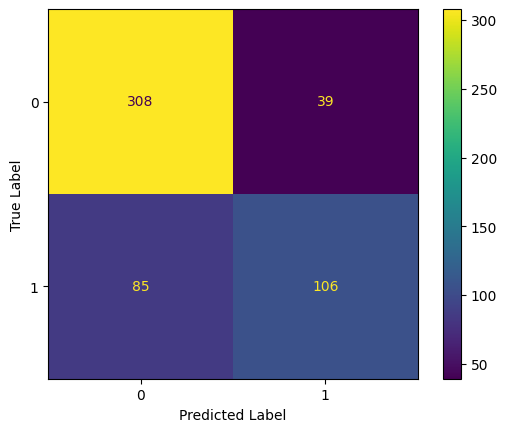

In [180]:
from sklearn.metrics import ConfusionMatrixDisplay
svc_cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(svc_cm, display_labels=model.classes_)
disp.plot()
# Add axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

In [181]:
# Confusion matrix values
TP = svc_cm[1, 1]
FP = svc_cm[0, 1]
TN = svc_cm[0, 0]
FN = svc_cm[1, 0]

# Calculate true positive rate (TPR) and false positive rate (FPR)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print("True Positive Rate:", round(TPR,3))
print("False Positive Rate:",round(FPR,3))

True Positive Rate: 0.555
False Positive Rate: 0.112


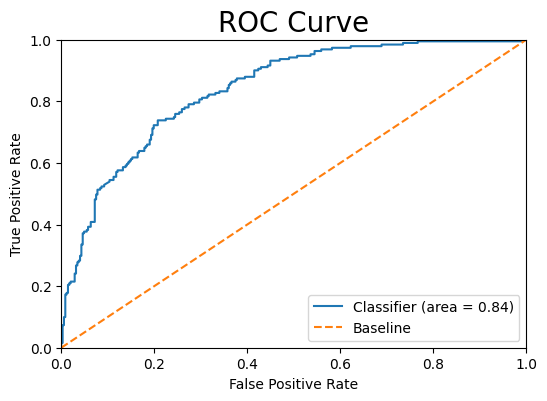

In [185]:
# Encoding target variables for ROC Curve Plot
# 0: No Diabetes; 1: Diabetes

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_test)
y_test=le.transform(y_test)
le.fit(y_train)
y_train=le.transform(y_train)

# Set the classifier
model = SVC(probability=True, kernel=svc_grid.best_params_['kernel']).fit(X_train, y_train)

# Calculate class probabilities, generate ROC curve, and compute AUC
y_proba=model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
classifier_roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='Classifier (area = %0.2f)' % classifier_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Baseline', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve',fontsize = "20")
plt.legend(loc="lower right")
plt.show()